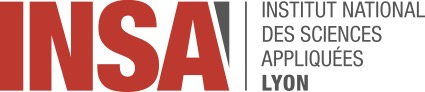
# P2I7: Chapitre 2 méthodes numériques
## Principe d'approximation d'une EDO par un schéma numérique
Camille Carvalho (INSA/ICJ)

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (linéarisé autour de l'état d'équilibre) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\theta(t), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


On souhaite approcher numériquement la solution de ce problème de Cauchy. Pour cela on va se fixer un $\Delta t > 0$ un pas de temps donné, $T > 0$ un temps de simulation avec $T = N\Delta t$, pour $N$ un entier, et on va poser
$$ t_i = i\Delta t ~~~\mbox{ pour } 0 \le i \le N. $$
On teste ici 3 schémas:
- Euler explicite
- Euler implicite
- Verlet

# Section 2.1 Schéma d'Euler explicite
**Question 1.** Remettez le problème de Cauchy ci-dessus sous la forme d'un système d'ordre 1 et écrivez le schéma d'Euler explicite dessus. Déduisez-en la règle qui fait passer de $\theta_i, \dot{\theta}_i$ à $\theta_{i+1}, \dot{\theta}_{i+1}$.

$\theta_{i+1} = \theta_i (t) + \Delta t \dot\theta_i (t)$ 

$\dot\theta_{i+1} = \dot\theta_i - \Delta t \frac{g}{l} \theta_i (t)$

**Question 2.** Programmer les itérations de ce schéma en Python et visualiser les solutions pour $\ell = 1$, $g = 10$, $\alpha=1$ et $T=10$.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


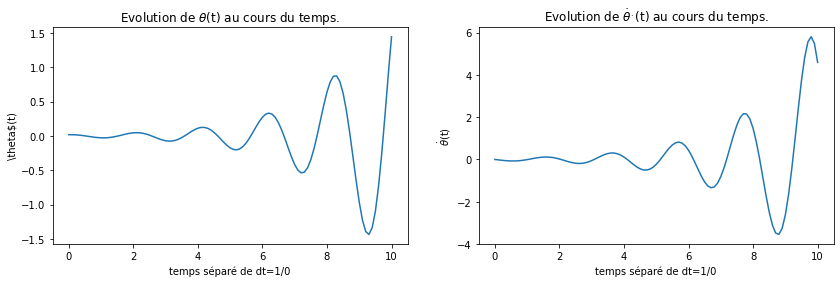

In [31]:
from numpy import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt

#2.1 Schéma d'Euler explicite
# Yi2 = Yi1 + dt * F
#2)
l=1; g=10; alpha=1; T=10; N=100; dt= T/N
X = np.linspace(0, T, N+1)
Y1 = np.zeros(N+1)
Y2 = np.zeros(N+1)

theta = alpha*pi/180 #deg --> rad
theta_p = 0
Y1[0], Y2[0] = theta, theta_p

for t in range(1, N+1):
    theta, theta_p = theta + dt*theta_p, theta_p -dt*(g/l)*theta
    Y1[t], Y2[t] = theta, theta_p

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4)) #le 1,2 veut dire une ligne 2 colonne soit deux graphes

ax1.set_xlabel(r'temps séparé de dt=1/0')
ax1.set_ylabel(r'\theta$(t)')
ax1.set_title(r'Evolution de $\theta$(t) au cours du temps.')

ax2.set_xlabel(r'temps séparé de dt=1/0')
ax2.set_ylabel(r'$\dot\theta$(t)')
ax2.set_title(r'Evolution de $\dot\theta^.$(t) au cours du temps.')

ax1.plot(X, Y1)
ax2.plot(X, Y2)

**Question 3.** L'énergie totale du système au pas de temps $i$ s'écrit
    $$ \frac{1}{2}  (\dot{\theta}_i)^2 + \frac{g}{2\ell}\theta_i^2. $$
    Le pendule étant non-amorti, cette énergie doit se conserver au cours
    du temps. Dessinez l'évolution de l'énergie totale au cours du temps.
    Que remarquez-vous ?

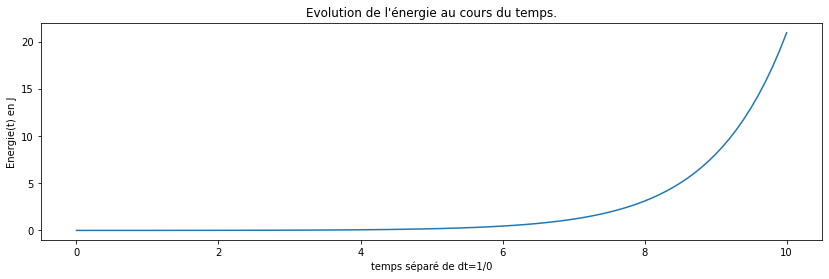

In [20]:
Energie = 1/2 * (Y2)**2 + (g/2*l) * (Y1)**2
fig, ax3 = plt.subplots(1, 1, figsize=(14,4))
ax3.set_xlabel(r'temps séparé de dt=1/0')
ax3.set_ylabel(r'Energie(t) en J')
ax3.set_title(r"Evolution de l'énergie au cours du temps.")
ax3.plot(X, Energie)

Remarquez que l'on peut éliminer la vitesse $\dot{\theta}_i$ (en soustrayant à la première ligne du schéma la m\^eme première ligne écrite au pas $i-1$). On obtient alors
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i-1}. $$
Cela peut être intéressant, mais il s'agit d'un schéma à **deux pas** ($\theta_{i+1}$ est donné en fonction de $\theta_i$ et $\theta_{i-1}$). En pratique, il faudra d'abord calculer $\theta_1$ avec le schéma à un pas avant de pouvoir l'utiliser.

# Section 2.2 Schéma d'Euler implicite 
On considère maintenant le schéma
$$ Y_{i+1} = Y_{i} + {\Delta t}F(t_{i+1}, Y_{i+1}). $$

**Question 1.** En réutilisant le problème ci-dessus sous la forme d'un système d'ordre 1, écrivez le schéma d'Euler implicite associé. Déterminer ce qui est à résoudre à chaque pas de temps.

$\theta_{i+1} = \theta_i + \Delta t \dot\theta_{i+1}$

$\dot\theta_{i+1} = \dot\theta_i - \Delta t \frac{g}{l} \theta_{i+1}$

On remplace et on obtient alors:

$\large \theta_{i+1} = \frac{\theta_i + \Delta t \dot\theta_i}{1+{\Delta t}^2 \frac{g}{l}}$

$\large \dot\theta_{i+1} = \dot\theta_i -\Delta t \frac{g}{l}\frac{\theta_i + \Delta t \dot\theta_i}{1+{\Delta t}^2 \frac{g}{l}}$ soit: $\large \dot\theta_{i+1} = \dot\theta_i - \frac{\theta_i \frac{1}{\Delta t} + \dot\theta_i}{\frac{l}{{\Delta t}^2 g} + 1}$

**Question 2.** Adaptez votre programme Python au schéma d'Euler implicite. Pour cela, trouvez l'équation que doit résoudre $\theta_{i+1}$. Pour notre problème, cette équation est linéaire et peut donc être résolue à la main. Ce ne sera pas le cas avec des problèmes non-linéaires. Visualisez la solution.

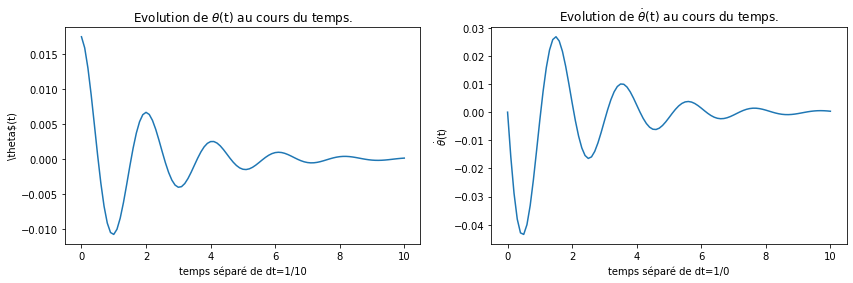

In [27]:
from numpy import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt

#2.1 Schéma d'Euler explicite
# Yi2 = Yi1 + dt * F
#2)
l=1; g=10; alpha=1; T=10; N=100; dt= T/N
X = np.linspace(0, T, N+1)
Y1 = np.zeros(N+1)
Y2 = np.zeros(N+1)

theta = alpha*pi/180 #deg --> rad
theta_p = 0
Y1[0], Y2[0] = theta, theta_p

for t in range(1, N+1):
    theta, theta_p = (theta + dt*theta_p)/(1+(dt**2)*(g/l)), theta_p -(theta*(1/dt)+theta_p)/((l/((dt**2)*g))+1)
    Y1[t], Y2[t] = theta, theta_p

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4)) #le 1,2 veut dire une ligne 2 colonne soit deux graphes

ax1.set_xlabel(r'temps séparé de dt=1/10')
ax1.set_ylabel(r'\theta$(t)')
ax1.set_title(r'Evolution de $\theta $(t) au cours du temps.')

ax2.set_xlabel(r'temps séparé de dt=1/0')
ax2.set_ylabel(r'$\dot\theta$(t)')
ax2.set_title(r'Evolution de $\dot\theta$(t) au cours du temps.')

ax1.plot(X, Y1)
ax2.plot(X, Y2)

**Question 3.** Dessinez également l'évolution de l'énergie totale au cours du temps.
  Que remarquez-vous comme différence avec le schéma d'Euler explicite ?

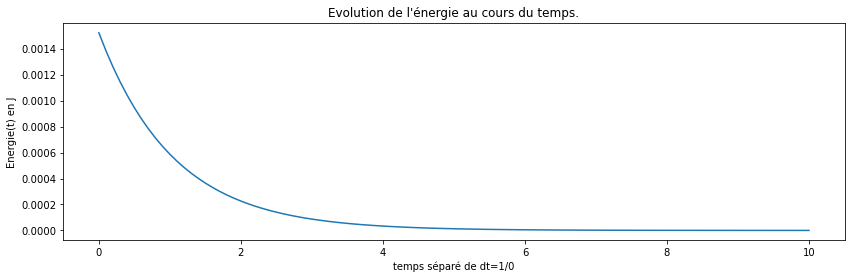

In [28]:
Energie = 1/2 * (Y2)**2 + (g/2*l) * (Y1)**2
fig, ax3 = plt.subplots(1, 1, figsize=(14,4))
ax3.set_xlabel(r'temps séparé de dt=1/0')
ax3.set_ylabel(r'Energie(t) en J')
ax3.set_title(r"Evolution de l'énergie au cours du temps.")
ax3.plot(X, Energie)

  
Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à **deux pas**
  $$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i+1}. $$

# Section 2.3 Schéma de Verlet
**Question 1.** Adaptez votre programme python au schéma de Verlet et visualiser la solutions ainsi que l'évolution de l'énergie totale. Que remarquez-vous ?

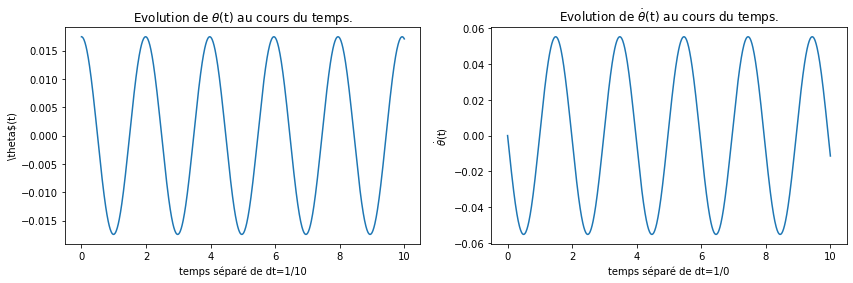

In [46]:
from numpy import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt

#2.1 Schéma d'Euler explicite
# Yi2 = Yi1 + dt * F
#2)
l=1; g=10; alpha=1; T=10; N=1000; dt= T/N
X = np.linspace(0, T, N+1)
Y1 = np.zeros(N+1)
Y2 = np.zeros(N+1)

theta = alpha*pi/180 #deg --> rad
theta_p = 0
Y1[0], Y2[0] = theta, theta_p

for t in range(1, N+1):
    theta, theta_p = theta + dt*theta_p - (g/l)*((dt**2)/2)*theta, theta_p - (g/l)*(dt/2)*(theta+(theta + dt*theta_p - (g/l)*((dt**2)/2)*theta))
    Y1[t], Y2[t] = theta, theta_p

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4)) #le 1,2 veut dire une ligne 2 colonne soit deux graphes

ax1.set_xlabel(r'temps séparé de dt=1/10')
ax1.set_ylabel(r'\theta$(t)')
ax1.set_title(r'Evolution de $\theta $(t) au cours du temps.')

ax2.set_xlabel(r'temps séparé de dt=1/0')
ax2.set_ylabel(r'$\dot\theta$(t)')
ax2.set_title(r'Evolution de $\dot\theta$(t) au cours du temps.')

ax1.plot(X, Y1)
ax2.plot(X, Y2)

[0.00152309 0.00152309 0.00152309 ... 0.00152308 0.00152308 0.00152307]


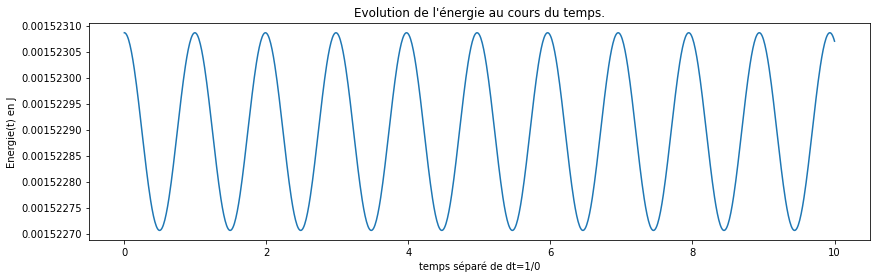

In [47]:
Energie = 1/2 * (Y2)**2 + (g/(2*l)) * (Y1)**2
print(Energie)
fig, ax3 = plt.subplots(1, 1, figsize=(14,4))
ax3.set_xlabel(r'temps séparé de dt=1/0')
ax3.set_ylabel(r'Energie(t) en J')
ax3.set_title(r"Evolution de l'énergie au cours du temps.")
ax3.plot(X, Energie)

### On ne remarque pas d'amortissement :(

Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à {\bf deux pas}
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i}. $$
  Il s'agit donc d'un schéma explicite qui est en un certain sens intermédiaire entre le schéma d'Euler explicite de celui d'Euler implicite.